In [9]:
import scienceplots

import matplotlib.pyplot as plt
plt.style.use('science')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Generamos un polinomio aleatorio con coeficientes entre 0 ,-1 y 1
def generate_random_polynomial(N, num_ones, num_neg_ones):
    coeffs = np.concatenate((np.ones(num_ones), -np.ones(num_neg_ones), np.zeros(N - (num_ones + num_neg_ones))))
    np.random.shuffle(coeffs)
    return coeffs

In [3]:

def reduce_coefficients(coeffs, q):
    return np.mod(coeffs + q // 2, q) - q // 2


In [4]:

def monte_carlo_simulation(N, q, num_iterations):
    coef_dict = defaultdict(int)
    for _ in range(num_iterations):
        f = generate_random_polynomial(N, N // 3, N // 3)
        m = generate_random_polynomial(N, N // 3, N // 3)
        product = np.convolve(f, m)[:N]  # Convolución circular
        reduced_coeffs = reduce_coefficients(product, q)
        for coeff in reduced_coeffs:
            coef_dict[coeff] += 1
    return coef_dict


In [20]:

def plot_distribution(coef_dict):
    plt.figure(figsize=(15, 9))
    coeffs = list(coef_dict.keys())
    counts = list(coef_dict.values())
    plt.bar(coeffs, counts, width=1.0, edgecolor='black')
    plt.xlabel('Coeficientes',fontsize=24)
    plt.ylabel('Frecuencia',fontsize=24)
    plt.title('Distribución de los coeficientes del producto convolucional de los polinomios pequeños $f$ y $m$',fontsize=24)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.savefig('./../graphics/warehouse/montecarlo.svg')
    plt.show()


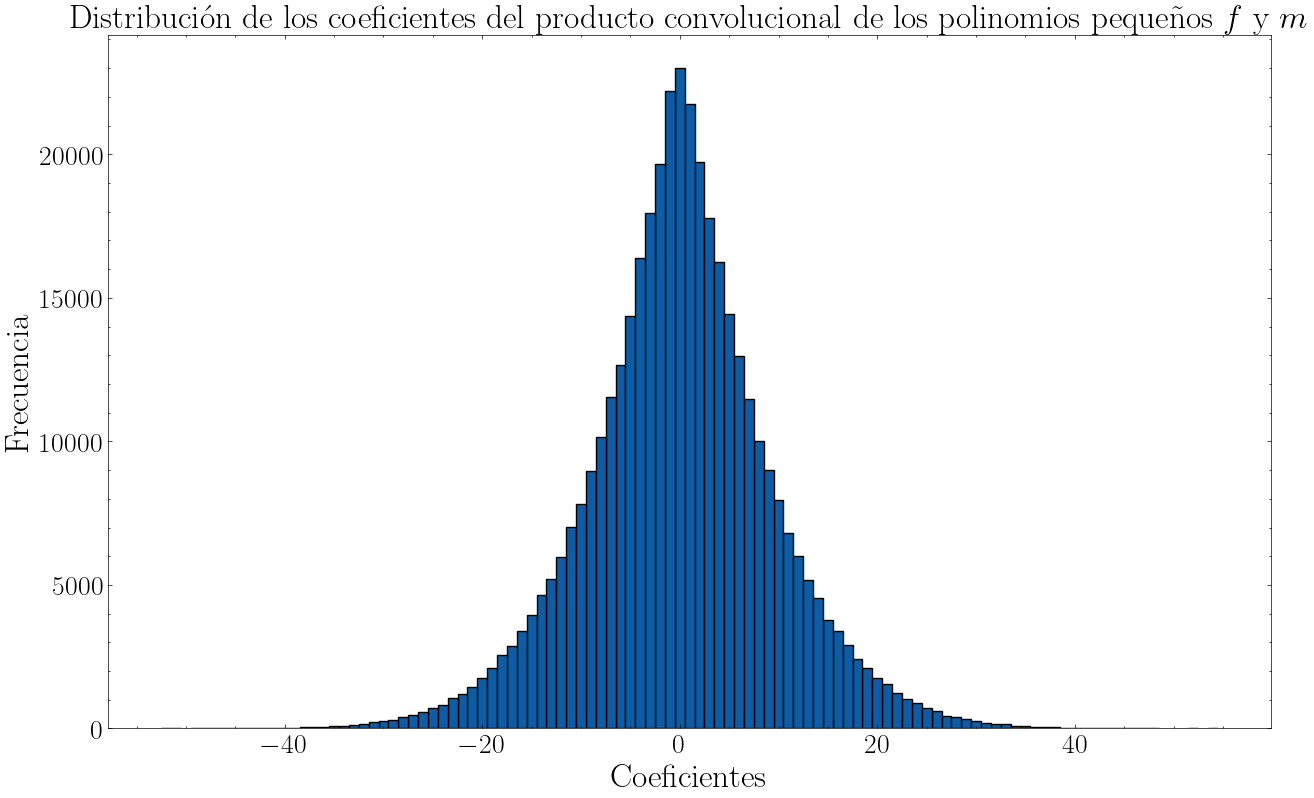

In [21]:

# Parámetros
N = 401
q = 256
num_iterations = 1000

# Simulación Monte Carlo
coef_dict = monte_carlo_simulation(N, q, num_iterations)

# Mostrar gráfica de la distribución de coeficientes
plot_distribution(coef_dict)
